# Getting Started

This notebook is intended to serve as an intro to data analysis and Python programming.

In [38]:
# Package installs
import matplotlib.pyplot as plt # For plotting graphs and charts
import numpy as np # For numerical operations
import os # For navigating the file system
import re # For regular expressions

from collections import Counter # For counting words
from utils import time_to_seconds # For parsing times in the transcripts

## Preprocessing

First, we'll load some example transcript files and convert them into the right format for analysis.

In [2]:
# We can run shell commands in Jupyter Notebooks by prefixing the command with an exclamation mark (!)
# This command lists the contents of the data directory:
!ls data/

Session1_Course1_Level1_BluePlayer_prealigned.srt
Session1_Course1_Level1_OrangePlayer_prealigned.srt
Session1_Course1_Level2_BluePlayer_prealigned.srt
Session1_Course1_Level2_OrangePlayer_prealigned.srt


We can start by printing out a file to look at it:

In [4]:
# We can read the contents of a file using the open() function
with open("data/Session1_Course1_Level1_BluePlayer_prealigned.srt", "r") as file:
    data = file.read()
    print(data)

1
00:00:03,503 --> 00:00:05,305
[REDACTED -- PERSONNEL] 

2
00:00:06,373 --> 00:00:10,110
[REDACTED -- PERSONNEL] 

3
00:00:12,379 --> 00:00:14,547
[REDACTED -- PERSONNEL]

4
00:00:15,582 --> 00:00:15,915
[REDACTED -- PERSONNEL]

5
00:00:17,450 --> 00:00:20,153
[REDACTED -- PERSONNEL]

6
00:00:21,821 --> 00:00:22,088
[REDACTED -- PERSONNEL]

7
00:00:22,989 --> 00:00:23,356
[REDACTED -- PERSONNEL]

8
00:00:25,358 --> 00:00:31,498
[REDACTED -- PERSONNEL]

9
00:00:34,968 --> 00:00:35,168
[REDACTED -- PERSONNEL]

10
00:00:42,809 --> 00:00:45,912
[REDACTED -- PERSONNEL]

11
00:00:52,585 --> 00:00:54,354
[REDACTED -- PERSONNEL]

12
00:00:54,788 --> 00:00:55,088
Yeah.

13
00:00:56,089 --> 00:00:56,790
I can.

14
00:00:57,257 --> 00:00:57,857
Hi.

15
00:00:58,992 --> 00:01:00,660
Do we press L right now or -- 

16
00:01:00,760 --> 00:01:00,960
[REDACTED -- PERSONNEL]

17
00:01:01,027 --> 00:01:02,829
Do we press L to mark right now?

18
00:01:02,862 --> 00:01:09,035
[REDACTED -- PERSONNEL]

19

If we want to just get the text from the `.srt` file, we can split it into lines as follows:

In [23]:
with open("data/Session1_Course1_Level2_BluePlayer_prealigned.srt", "r") as file:
    lines = file.readlines()
    print("Number of lines in the file: ", len(lines))
    # Python lists are zero-indexed, so the third line can be accessed by lines[2]
    print("Third line in the file: ", lines[2])

Number of lines in the file:  559
Third line in the file:  Mm.



We can see that every fourth line of the `.srt` contains text, so we can write a for loop to print out just those lines:

In [24]:
for idx, line in enumerate(lines):
    if idx % 4 == 2:
        print(line.strip())

Mm.
Okay, press L.
()
There, I guess.
Huh.
There's a portal here.
I can place one to see what happens.
And uh ... this one here.
Can see what it does.
Does it do anything?
Oh.
I kinda (honestly) --
Wait, wait.
Did you see anything happen?
The -- the -- something got like --
The hatch get opened over there, but I don't really know what --
Oh, let me see.
Maybe I can --
Oof.
Ah, I see.
Can you please --
()
Uh.
I don’t know, maybe we can ... ask.
I -- I -- I don't know, maybe no, I guess.
Maybe no.
So this --
Yeah.
Uh.
I guess this is for the researchers to like synchronize the -- the recording so, but you can ask them, I guess.
Anyway.
So can (you) -- can you please come here to the red button?
Yeah.
And uh let me go through the portal.
Cool.
And can you please --
Oh wait!
Don't -- don't go through the portal (yet).
Uh, anyway  I --
Yeah.
And uh can you press the uh the red button over there?
I mean (over) -- over there.
Yeah.
Yeah.
I --
(Sorry) -- sorry.
Uh the button uh (over) -- over 

To explain what's going on in the above code in a bit more depth:

- `for idx, line in enumerate(lines):`: This loops over every element in `lines`, which is a list of the lines in the document. For each line, this returns the index of that line, `idx`, as well as the text of the line itself, `line`
- `if idx % 4 == 2:`: This line checks to see if the index of a line is a multiple of four plus two. Here, `%` is a modulo operator, meaning that it conducts division and returns the remainder (e.g., `17 % 4` would be equal to `1`). Then, `==` checks for equality. If the condition is met, then the code inside the if block operates.
- `print(line.strip())`: This code prints out lines that meet the above criteria. The `.split()` is an operation that removes the newline token from the end of each line.

Now, let's combine the data from the orange and blue players' perspectives:

In [25]:
with open("data/Session1_Course1_Level2_BluePlayer_prealigned.srt", "r") as file:
    blue_lines = file.readlines()
with open("data/Session1_Course1_Level2_OrangePlayer_prealigned.srt", "r") as file:
    orange_lines = file.readlines()

all_lines = []
# Iterate over the blue_lines and orange_lines lists:
for idx, line in enumerate(blue_lines):
    if idx % 4 == 1:
        start_time = line.split("-->")[0]
        start_time = time_to_seconds(start_time.strip())
    if idx % 4 == 2:
        message = line.strip()
        all_lines.append((start_time, message, "Blue"))

for idx, line in enumerate(orange_lines):
    if idx % 4 == 1:
        start_time = line.split("-->")[0]
        start_time = time_to_seconds(start_time.strip())
    if idx % 4 == 2:
        message = line.strip()
        all_lines.append((start_time, message, "Orange"))

# Sort the all_lines list based on the start time:
all_lines.sort(key=lambda x: x[0])

Now, we can print out the full transcript for a game:

In [26]:
for line in all_lines:
    print(line[2], ":", line[1])

Blue : Mm.
Orange : Yeah, let's press L.
Blue : Okay, press L.
Blue : ()
Blue : There, I guess.
Blue : Huh.
Blue : There's a portal here.
Blue : I can place one to see what happens.
Blue : And uh ... this one here.
Blue : Can see what it does.
Blue : Does it do anything?
Blue : Oh.
Blue : I kinda (honestly) --
Blue : Wait, wait.
Blue : Did you see anything happen?
Blue : The -- the -- something got like --
Blue : The hatch get opened over there, but I don't really know what --
Blue : Oh, let me see.
Blue : Maybe I can --
Orange : Alright, I killed myself.
Blue : Oof.
Blue : Ah, I see.
Blue : Can you please --
Orange : Wait, do I have to press L when I die too?
Blue : ()
Blue : Uh.
Blue : I don’t know, maybe we can ... ask.
Blue : I -- I -- I don't know, maybe no, I guess.
Blue : Maybe no.
Blue : So this --
Orange : If it's the beginning of each level, technically I have to press ().
Blue : Yeah.
Orange : Wait I’ll press (it).
Blue : Uh.
Blue : I guess this is for the researchers to lik

## Basic Data Statistics
Now that we've loaded the data, we can do some basic analyses on it.

In [28]:
# Data cleaning:
def clean_text(text):
    text = text.replace("((", "*")
    text = text.replace("))", "*")
    text = text.replace("(", "")
    text = text.replace(")", "")
    # Remove any text between square brackets:
    text = re.sub(r'\[.*?\]', '', text)
    return text

# Apply the clean_text function to all messages:
all_lines_clean = [(start_time, clean_text(message), team) for start_time, message, team in all_lines]

[(3.036, 'Mm.', 'Blue'), (3.636, "Yeah, let's press L.", 'Orange'), (3.67, 'Okay, press L.', 'Blue'), (8.641, '', 'Blue'), (10.043, 'There, I guess.', 'Blue'), (13.48, 'Huh.', 'Blue'), (15.048, "There's a portal here.", 'Blue'), (17.283, 'I can place one to see what happens.', 'Blue'), (20.186, 'And uh ... this one here.', 'Blue'), (25.158, 'Can see what it does.', 'Blue'), (26.693, 'Does it do anything?', 'Blue'), (31.464, 'Oh.', 'Blue'), (32.632, 'I kinda honestly --', 'Blue'), (37.003, 'Wait, wait.', 'Blue'), (38.338, 'Did you see anything happen?', 'Blue'), (39.639, 'The -- the -- something got like --', 'Blue'), (41.608, "The hatch get opened over there, but I don't really know what --", 'Blue'), (45.311, 'Oh, let me see.', 'Blue'), (47.914, 'Maybe I can --', 'Blue'), (48.815, 'Alright, I killed myself.', 'Orange'), (49.149, 'Oof.', 'Blue'), (50.45, 'Ah, I see.', 'Blue'), (51.418, 'Can you please --', 'Blue'), (52.285, 'Wait, do I have to press L when I die too?', 'Orange'), (52.4

We can start by computing the total number of messages, and the average message length:

In [35]:
print("Number of messages: ", len(all_lines_clean))

message_lengths = []
for line in all_lines_clean:
    message_lengths.append(len(line[1].split()))
print("Average message length (words): ", np.mean(message_lengths))
print("Median message length (words): ", np.median(message_lengths))

Number of messages:  170
Average message length (words):  4.91764705882353
Median message length (words):  4.0


We can use `matplotlib` to plot messages:

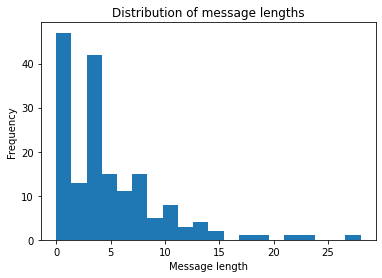

In [36]:
# I'd recommend using Copilot/ChatGPT to generate plotting code:
plt.hist(message_lengths, bins=20)
plt.xlabel("Message length")
plt.ylabel("Frequency")
plt.title("Distribution of message lengths")
plt.show()

Finally, let's find the most common words in this data:

In [39]:
# 1. Create a Counter object to store the word counts:
word_counts = Counter()

for line in all_lines_clean:
    # 2. Remove any non-alphabetic characters from the message:
    message = re.sub(r'[^a-zA-Z ]', '', line[1])
    # 3. Convert the message to lowercase:
    message = message.lower()
    # 4. Split the message into words:
    words = message.split()
    # 5. Update the word counts:
    word_counts.update(words)

# 6. Print the 10 most common words:
print(word_counts.most_common(10))

[('the', 42), ('i', 34), ('uh', 32), ('yeah', 27), ('press', 25), ('and', 23), ('you', 23), ('can', 22), ('to', 20), ('we', 19)]


Finally, let's compare the most common words in our data to the most common words in the Brown Corpus.

In [40]:
import nltk
from nltk.corpus import brown
from collections import Counter

In [45]:
nltk.download('brown')
words = brown.words()
words = [word.lower() for word in words]
brown_word_counts = Counter(words)
print(brown_word_counts.most_common(10))

[nltk_data] Downloading package brown to
[nltk_data]     /Users/nickatomlin/nltk_data...
[nltk_data]   Package brown is already up-to-date!


[('the', 69971), (',', 58334), ('.', 49346), ('of', 36412), ('and', 28853), ('to', 26158), ('a', 23195), ('in', 21337), ('that', 10594), ('is', 10109)]


In [47]:
# Divide word_counts by brown_word_counts to get the relative frequency of each word:
word_frequencies = {word: count / brown_word_counts[word] for word, count in word_counts.items() if brown_word_counts[word] > 0}
# Get the 10 most common words based on frequency:
most_common_words = Counter(word_frequencies).most_common(10)
print(most_common_words)

[('uh', 5.333333333333333), ('portal', 4.0), ('synchronize', 3.0), ('button', 1.3), ('lets', 1.2), ('yeah', 1.08), ('ooh', 1.0), ('interact', 1.0), ('um', 0.5), ('huh', 0.4)]
